In [1]:
import pandas as pd
import numpy as np

In [2]:
file = r"D:\GIT\Challenge\bike_share_project\sharing\artifact\data_ingestion\2022-07-13-12-39-10\raw_data\hour.csv"


In [3]:
df = pd.read_csv(file)
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
pip install matplotlib

  Using cached matplotlib-3.5.2-cp37-cp37m-win_amd64.whl (7.2 MB)
  Using cached kiwisolver-1.4.3-cp37-cp37m-win_amd64.whl (54 kB)
  Using cached Pillow-9.2.0-cp37-cp37m-win_amd64.whl (3.3 MB)
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:ylabel='Frequency'>

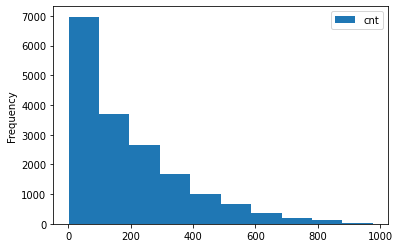

In [6]:
df[["cnt"]].plot(kind="hist")

In [7]:
df["count_cat"] = pd.cut(
                df["cnt"],
                bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                labels=[1,2,3,4,5]
            )

In [9]:
df.count_cat.value_counts()

5    16062
4      496
2      432
3      231
1      158
Name: count_cat, dtype: int64

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [12]:
for tr_ix, te_ix in split.split(df, df['count_cat']):
    print(tr_ix,te_ix)

[12965  2687 13316 ...  6263 13996 15127] [17196 14322 16881 ...  8594  9010  2368]


In [14]:
train_df = df.loc[tr_ix]
train_df.shape

(13903, 18)

In [15]:
df.shape

(17379, 18)

In [16]:
test_df = df.loc[te_ix]
test_df.shape

(3476, 18)

In [17]:
import matplotlib.pyplot as plt

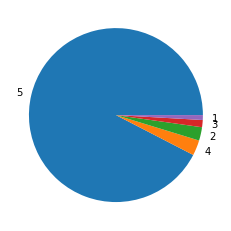

In [19]:
plt.pie(train_df.count_cat.value_counts(), labels=train_df.count_cat.value_counts().index)
plt.show()

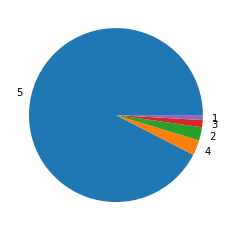

In [20]:
plt.pie(test_df.count_cat.value_counts(), labels=test_df.count_cat.value_counts().index)
plt.show()